# Heart Failure Classification

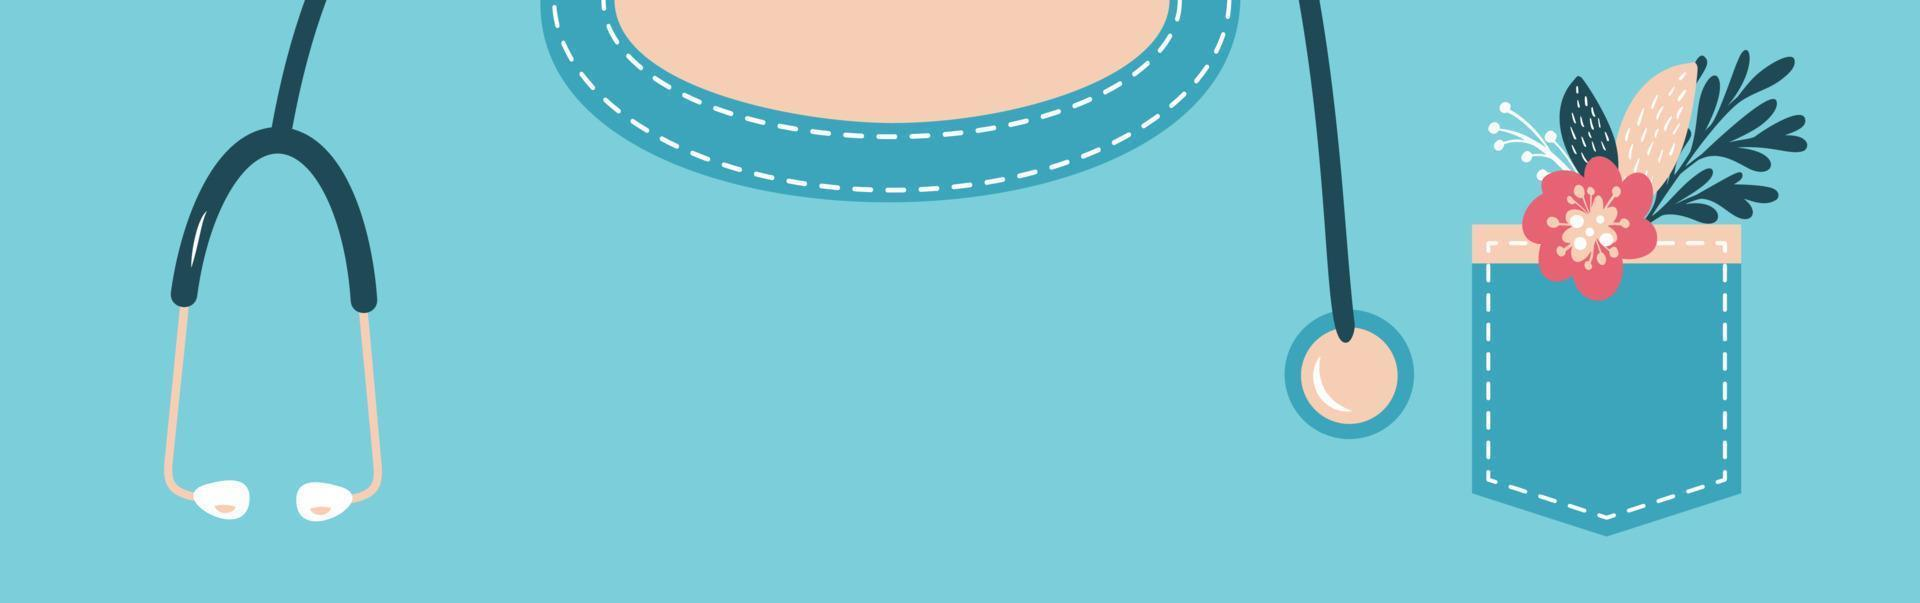

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations

Dataset Source: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [ ]:
# Import packages and mount drive
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import sklearn as sk
import seaborn as sns
from scipy.stats import gaussian_kde
import warnings
warnings.filterwarnings('ignore')

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Validate the file location
!ls "/content/drive/MyDrive/DSO 568 Group Work Healthcare"

'Copy of Heart Failure Prediction'				'FINAL REPORT TO SUBMIT .gdoc'
'DSO 568 Healthcare Analytics Project Proposal (Group 9).gdoc'	 heart.csv
'DSO 568 Project Presentation.gslides'				'Heart Failure Prediction.ipynb'
'Final Project Assignment - DSO 568 Healthcare Analytics.pdf'


In [ ]:
# read csv as Pandas DataFrame
file_path = "/content/drive/MyDrive/DSO 568 Group Work Healthcare/heart.csv"
df = pd.read_csv(file_path)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
columns = df.columns
print(f"Columns: \n{columns}")
df.shape #no. of rows, columns

Columns: 
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


(918, 12)

In [ ]:
# Explore data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Check for nulls
for column in columns:
  print(f"Null count for {column}: {df[column].isnull().sum()}")

Null count for Age: 0
Null count for Sex: 0
Null count for ChestPainType: 0
Null count for RestingBP: 0
Null count for Cholesterol: 0
Null count for FastingBS: 0
Null count for RestingECG: 0
Null count for MaxHR: 0
Null count for ExerciseAngina: 0
Null count for Oldpeak: 0
Null count for ST_Slope: 0
Null count for HeartDisease: 0


## EXPLORATORY DATA ANALYSIS

In [ ]:
# Explore data summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Age: The average patient age is 53.5 years, with a range from 28 to 77 years. Most patients fall between 47 and 60 years old.

RestingBP: The average resting blood pressure is 132.4 mmHg, but values range from 0 (likely missing) to 200 mmHg. Most patients have blood pressure between 120 and 140 mmHg.

Cholesterol: Cholesterol levels average 198.8 mg/dL, ranging from 0 (missing) to 603 mg/dL. Most values lie between 173 and 267 mg/dL.
FastingBS: About 23.3% of patients have elevated fasting blood sugar (1), with the rest at normal levels (0).

MaxHR: The average maximum heart rate is 136.8 bpm, with values ranging from 60 to 202 bpm. Most patients' heart rates are between 120 and 156 bpm.

Oldpeak: ST depression averages 0.89, ranging from -2.6 to 6.2. Most values fall between 0 and 1.5.

HeartDisease: 55.3% of patients are diagnosed with heart disease (1), indicating balanced dataset.

In [ ]:
# The means of each feature by if they have heart disease
df_yes = df[df['HeartDisease'] == 1]
df_no = df[df['HeartDisease'] == 0]
df_yes_describe = df[df['HeartDisease'] == 1].describe().T
df_no_describe = df[df['HeartDisease'] == 0].describe().T
df_describe_class = pd.DataFrame()
df_describe_class['Yes Mean'] = df_yes_describe['mean']
df_describe_class['No Mean'] = df_no_describe['mean']
df_describe_class

,Yes Mean,No Mean
Age,55.899606,50.551220
RestingBP,134.185039,130.180488
Cholesterol,175.940945,227.121951
FastingBS,0.334646,0.107317
MaxHR,127.655512,148.151220
Oldpeak,1.274213,0.408049
HeartDisease,1.000000,0.000000


### Distribution of Numeric Variables and by Target Class

In [ ]:
# Split numerical and categorical variables
numerical_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
categorical_features = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

# Plot the distribution of numerical features
for feature in numerical_features:
    fig = px.histogram(df, x=feature, title=f"Distribution of {feature}", nbins=50)
    fig.show()

    # Plot the distribution of numerical features By Heart Disease
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=df_yes[feature], nbinsx=50, opacity=0.5, name='Yes', marker_color='red' ))
    fig.add_trace(go.Histogram(x=df_no[feature], nbinsx=50, opacity=0.5, name='No', marker_color='blue' ))
    fig.update_layout(title=f"Distribution of {feature} By Heart Disease",
                      xaxis_title=feature, yaxis_title="Count", barmode='group')
    fig.show()


### Distribution of Categorical Variables

In [ ]:
# Plot the distribution for each categorical feature
for feature in categorical_features:
    count = df[feature].value_counts()
    total_count = count.sum()
    fig = px.bar(count, x=count.index, y = count.values, title=f"Bar Chart of {feature}", labels={'x': feature, 'y': 'Count'})
    fig.update_traces(text=[f'{(v/total_count)*100:.2f}%' for v in count.values], textposition='inside')
    fig.show()

### Distribution of Categorical Variables by Target Class

In [ ]:
# Distribution of categorical features By Heart Disease
for feature in categorical_features:
    count_y = df_yes[feature].value_counts()
    count_n = df_no[feature].value_counts()
    total_y = count_y.sum()
    total_n = count_n.sum()

    fig = go.Figure()
    fig.add_trace(go.Bar(x=count_y.index, y = count_y.values, name = "Heart Disease (Yes)", opacity = 0.5, marker_color = "red",
                         text=[f'{(v/total_y)*100:.2f}%' for v in count_y.values], textposition='inside'))
    fig.add_trace(go.Bar(x=count_n.index, y = count_n.values, name = "Heart Disease (No)", opacity = 0.5, marker_color = "blue",
                         text=[f'{(v/total_n)*100:.2f}%' for v in count_n.values], textposition='inside'))
    fig.update_layout(title=f"Distribution of {feature} By Heart Disease",
                      xaxis_title=feature, yaxis_title="Count", barmode='group')
    fig.show()

### Visualize the Correlation Matrix

In [ ]:
# Correlation matrix highlighting all significant correlations >0.25 or <-0.25
round_corr.style.applymap(lambda x: 'color: red; font-weight: bold' if (abs(x) >= 0.25 and x != 1) else '')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.060000,-0.080000,0.250000,-0.100000,0.200000,-0.010000,-0.380000,0.220000,0.260000,-0.270000,0.280000
Sex,0.060000,1.000000,-0.130000,0.010000,-0.200000,0.120000,0.070000,-0.190000,0.190000,0.110000,-0.150000,0.310000
ChestPainType,-0.080000,-0.130000,1.000000,-0.020000,0.070000,-0.070000,-0.070000,0.290000,-0.350000,-0.180000,0.210000,-0.390000
RestingBP,0.250000,0.010000,-0.020000,1.000000,0.100000,0.070000,0.020000,-0.110000,0.160000,0.160000,-0.080000,0.110000
Cholesterol,-0.100000,-0.200000,0.070000,0.100000,1.000000,-0.260000,-0.200000,0.240000,-0.030000,0.050000,0.110000,-0.230000
FastingBS,0.200000,0.120000,-0.070000,0.070000,-0.260000,1.000000,0.090000,-0.130000,0.060000,0.050000,-0.180000,0.270000
RestingECG,-0.010000,0.070000,-0.070000,0.020000,-0.200000,0.090000,1.000000,-0.180000,0.080000,-0.020000,-0.010000,0.060000
MaxHR,-0.380000,-0.190000,0.290000,-0.110000,0.240000,-0.130000,-0.180000,1.000000,-0.370000,-0.160000,0.340000,-0.400000
ExerciseAngina,0.220000,0.190000,-0.350000,0.160000,-0.030000,0.060000,0.080000,-0.370000,1.000000,0.410000,-0.430000,0.490000
Oldpeak,0.260000,0.110000,-0.180000,0.160000,0.050000,0.050000,-0.020000,-0.160000,0.410000,1.000000,-0.500000,0.400000


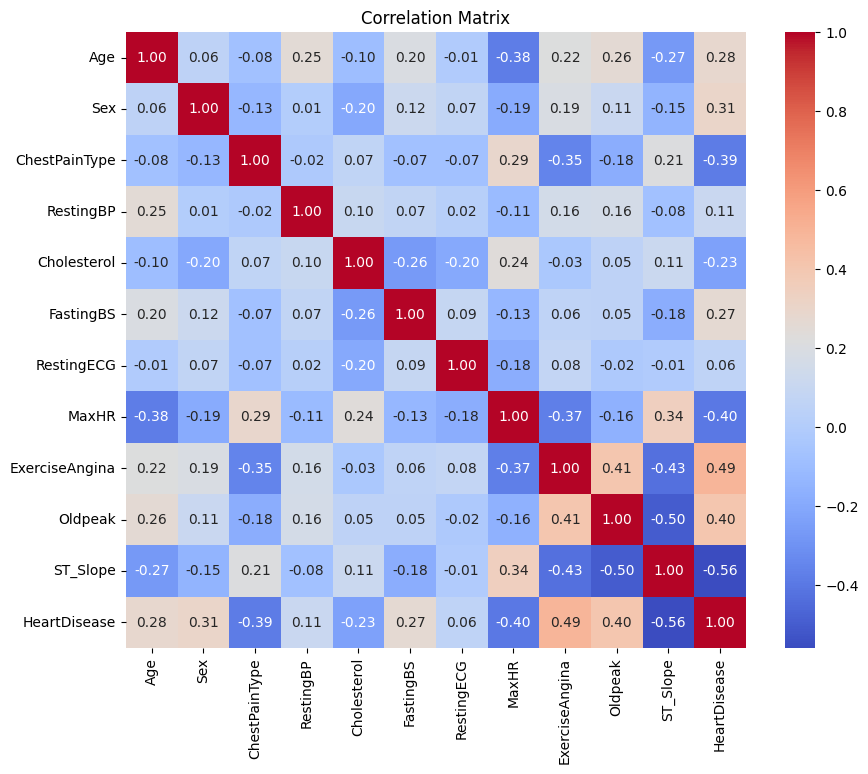

In [ ]:
# Deep copy data and apply label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep=True)

# Label encoding of categorical columns
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for column in categorical_columns:
    df1[column] = le.fit_transform(df1[column])

# Calculate correlation matrix
corr_matrix = df1.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

ExerciseAngina (0.49): Strong positive correlation.
Oldpeak (0.40): Moderate positive correlation.
ST_Slope (-0.56): Strong negative correlation.
MaxHR (-0.40): Moderate negative correlation.

RestingBP (0.11), Cholesterol (-0.23), and RestingECG (0.06) show weak relationships with heart disease.

Age and MaxHR (-0.38): Older age is associated with lower maximum heart rate.
ExerciseAngina and ST_Slope (-0.43): Exercise-induced angina is inversely correlated with ST slope.

These insights suggest key predictors for heart disease may include ExerciseAngina, ST_Slope, MaxHR, and Oldpeak.

Except for RestingBP, Cholesterol, and RestingECG, everyone displays a positive or negative relationship with HeartDisease.

### Scatter Plot Distribution by Target Class for ST_Slope vs Numerical Features

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Define the number of rows and columns for each set of subplots
fig1 = make_subplots(rows=1, cols=3, subplot_titles=[f"{num_feat} vs ST_Slope" for num_feat in numerical_features[:3]])

# First set of subplots
for i in range(3):
    fig_strip = px.strip(df, x='ST_Slope', y=numerical_features[i], color='HeartDisease',
                         color_discrete_map={'No': 'blue', 'Yes': 'red'},
                         title=f"{numerical_features[i]} vs ST_Slope")

    for trace in fig_strip.data:
        fig1.add_trace(trace, row=1, col=i+1)

fig1.update_layout(height=500, width=1500, showlegend=True)
fig1.show()

# Second set of subplots
fig2 = make_subplots(rows=1, cols=2, subplot_titles=[f"{num_feat} vs ST_Slope" for num_feat in numerical_features[-2:]])

# Second set of subplots
for i, j in enumerate([-2, -1]):
    fig_strip = px.strip(df, x='ST_Slope', y=numerical_features[j], color='HeartDisease',
                         color_discrete_map={'No': 'blue', 'Yes': 'red'},
                         title=f"{numerical_features[j]} vs ST_Slope")

    for trace in fig_strip.data:
        fig2.add_trace(trace, row=1, col=i+1)

fig2.update_layout(height=500, width=1000, showlegend=True)
fig2.show()


### Scatter Plot Distribution by Target Class for RestingBP vs Numerical Features

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# First set of subplots
fig1 = make_subplots(rows=1, cols=3, subplot_titles=[f"{num_feat} vs Sex" for num_feat in numerical_features[:3]])

for i in range(3):
    fig_strip = px.strip(df, x='Sex', y=numerical_features[i], color='HeartDisease',
                         color_discrete_map={'No': 'blue', 'Yes': 'red'},
                         title=f"{numerical_features[i]} vs Sex")

    for trace in fig_strip.data:
        fig1.add_trace(trace, row=1, col=i+1)

fig1.update_layout(height=500, width=1500, showlegend=True)
fig1.show()

# Second set of subplots
fig2 = make_subplots(rows=1, cols=2, subplot_titles=[f"{num_feat} vs Sex" for num_feat in numerical_features[-2:]])

for i, j in enumerate([-2, -1]):
    fig_strip = px.strip(df, x='Sex', y=numerical_features[j], color='HeartDisease',
                         color_discrete_map={'No': 'blue', 'Yes': 'red'},
                         title=f"{numerical_features[j]} vs Sex")

    for trace in fig_strip.data:
        fig2.add_trace(trace, row=1, col=i+1)

fig2.update_layout(height=500, width=1000, showlegend=True)
fig2.show()


### Scatter Plot Distribution by Target Class for Chest Pain Type vs Numerical Features

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# First set of subplots
fig1 = make_subplots(rows=1, cols=3, subplot_titles=[f"{num_feat} vs ChestPainType" for num_feat in numerical_features[:3]])

for i in range(3):
    fig_strip = px.strip(df, x='ChestPainType', y=numerical_features[i], color='HeartDisease',
                         color_discrete_map={'No': 'blue', 'Yes': 'red'},
                         title=f"{numerical_features[i]} vs ChestPainType")

    for trace in fig_strip.data:
        fig1.add_trace(trace, row=1, col=i+1)

fig1.update_layout(height=500, width=1500, showlegend=True)
fig1.show()

# Second set of subplots
fig2 = make_subplots(rows=1, cols=2, subplot_titles=[f"{num_feat} vs ChestPainType" for num_feat in numerical_features[-2:]])

for i, j in enumerate([-2, -1]):
    fig_strip = px.strip(df, x='ChestPainType', y=numerical_features[j], color='HeartDisease',
                         color_discrete_map={'No': 'blue', 'Yes': 'red'},
                         title=f"{numerical_features[j]} vs ChestPainType")

    for trace in fig_strip.data:
        fig2.add_trace(trace, row=1, col=i+1)

fig2.update_layout(height=500, width=1000, showlegend=True)
fig2.show()


### Scatter Plot Distribution by Target Class for Exercise Angina vs Numerical Features

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# First set of subplots
fig1 = make_subplots(rows=1, cols=3, subplot_titles=[f"{num_feat} vs ExerciseAngina" for num_feat in numerical_features[:3]])

for i in range(3):
    fig_strip = px.strip(df, x='ExerciseAngina', y=numerical_features[i], color='HeartDisease',
                         color_discrete_map={'No': 'blue', 'Yes': 'red'},
                         title=f"{numerical_features[i]} vs ExerciseAngina")

    for trace in fig_strip.data:
        fig1.add_trace(trace, row=1, col=i+1)

fig1.update_layout(height=500, width=1500, showlegend=True)
fig1.show()

# Second set of subplots
fig2 = make_subplots(rows=1, cols=2, subplot_titles=[f"{num_feat} vs ExerciseAngina" for num_feat in numerical_features[-2:]])

for i, j in enumerate([-2, -1]):
    fig_strip = px.strip(df, x='ExerciseAngina', y=numerical_features[j], color='HeartDisease',
                         color_discrete_map={'No': 'blue', 'Yes': 'red'},
                         title=f"{numerical_features[j]} vs ExerciseAngina")

    for trace in fig_strip.data:
        fig2.add_trace(trace, row=1, col=i+1)

fig2.update_layout(height=500, width=1000, showlegend=True)
fig2.show()


### Scatter Plot Distribution by Target Class for Fasting Blood Sugar vs Numerical Features

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# First set of subplots
fig1 = make_subplots(rows=1, cols=3, subplot_titles=[f"{num_feat} vs Fasting Blood Sugar" for num_feat in numerical_features[:3]])

for i in range(3):
    fig_strip = px.strip(df, x='FastingBS', y=numerical_features[i], color='HeartDisease',
                         color_discrete_map={'No': 'blue', 'Yes': 'red'},
                         title=f"{numerical_features[i]} vs Fasting Blood Sugar")

    for trace in fig_strip.data:
        fig1.add_trace(trace, row=1, col=i+1)

fig1.update_layout(height=500, width=1500, showlegend=True)
fig1.show()

# Second set of subplots
fig2 = make_subplots(rows=1, cols=2, subplot_titles=[f"{num_feat} vs Fasting Blood Sugar" for num_feat in numerical_features[-2:]])

for i, j in enumerate([-2, -1]):
    fig_strip = px.strip(df, x='FastingBS', y=numerical_features[j], color='HeartDisease',
                         color_discrete_map={'No': 'blue', 'Yes': 'red'},
                         title=f"{numerical_features[j]} vs Fasting Blood Sugar")

    for trace in fig_strip.data:
        fig2.add_trace(trace, row=1, col=i+1)

fig2.update_layout(height=500, width=1000, showlegend=True)
fig2.show()

## FEATURE ENGINEERING

In [ ]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['HeartDisease'])  # Features
y = df['HeartDisease']  # Target

# Identify categorical and continuous features
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
continuous_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),  # Scaling continuous features
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # One-hot encoding categorical features
    ])

# Apply transformations
X_transformed = preprocessor.fit_transform(X)


NameError: name 'df' is not defined

In [ ]:
# Convert transformed data to DataFrame for readability
feature_names = preprocessor.get_feature_names_out()
X_transformed = pd.DataFrame(X_transformed, columns=feature_names)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Save processed data for further use
X_train.to_csv('X_train_processed.csv', index=False)
X_test.to_csv('X_test_processed.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


NameError: name 'preprocessor' is not defined

## MODELING

Let's initialize our models and save our best model parameters from grid search (where applicable). Our gridsearches are optimized for AUC-ROC, which is good for general model performance. We also tried optimizing for recall, which is usually the most important metric in a healthcare context, but since we were not pleased with the results we defaulted back to AUC-ROC.

In [ ]:
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support,
    roc_auc_score,
    log_loss,
)

In [ ]:
df.head()

NameError: name 'df' is not defined

1. Logistic Regression

In [ ]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Train logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Print model summary
print(logit_model.summary())

# Make predictions on test data
y_pred_sm = logit_model.predict(X_test_sm)
y_pred_class = (y_pred_sm > 0.5).astype(int)  # Convert probabilities to binary outcomes



NameError: name 'X_train' is not defined

At this time we're not removing any statistically insignificant features or applying tranformations, since we are mostly including a logistic regression as a benchmark for other models.

Decision Tree With Gridsearch and Cross Validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier and the hyperparameter grid
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": [3,4,5,6,7,8,9,10, None],
    "min_samples_split": [2,3,4,5, 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# Extract the best model
best_tree = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


NameError: name 'X_train' is not defined

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10}

Random Forest With Gridsearch and Cross Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier and hyperparameter grid
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [20,30, 40, 50, 100, 200],
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 3, 4, 5, 10],
    "min_samples_leaf": [1, 2, 4, 6],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search_rf_model = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_rf_model.fit(X_train, y_train)

# Extract the best model and parameters
best_rf_model = grid_search_rf_model.best_estimator_
best_rf_params = grid_search_rf_model.best_params_
print(f"Best Parameters: {best_rf_params}")


NameError: name 'X_train' is not defined

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}

LightGBM With Gridsearch and Cross Validation

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define the LightGBM classifier and hyperparameter grid
lgb_classifier = lgb.LGBMClassifier(random_state=42)
param_grid_lgb = {
    "num_leaves": [10,20, 31, 50, 100],
    "max_depth": [-1, 3, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [50, 100, 200],
    "min_child_samples": [20, 35, 50, 100],
}

# Perform GridSearchCV
grid_search_lgb_model = GridSearchCV(
    estimator=lgb_classifier,
    param_grid=param_grid_lgb,
    scoring="roc_auc",
    cv=5,
    verbose=0,
)
grid_search_lgb_model.fit(X_train, y_train)

# Extract the best model and parameters
best_lgb_model = grid_search_lgb_model.best_estimator_
best_lgb_params = grid_search_lgb_model.best_params_
print(f"Best Parameters: {best_lgb_params}")


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit


Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_child_samples': 50, 'n_estimators': 100, 'num_leaves': 10}


XGBoost With Gridsearch and Cross Validation

In [ ]:
import xgboost as xgb

# Define the XGBoost classifier and hyperparameter grid
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
param_grid_xgb = {
    "n_estimators": [20,30,40, 50, 100, 200],
    "max_depth": [3, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "min_child_weight": [1, 3, 5],
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid_xgb,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_xgb.fit(X_train, y_train)

# Extract the best model and parameters
best_xgb = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_
print(f"Best Parameters: {best_xgb_params}")

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 30, 'subsample': 0.8}


Neural Network

In [ ]:
import tensorflow as tf
from sklearn.metrics import (
    precision_recall_fscore_support,
    roc_auc_score,
    log_loss,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Define the model
nn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=0
)


## MODEL EVALUATION

Logistic Regression


Metrics:
Precision: 0.89
Recall (Sensitivity): 0.79
F1 Score: 0.84
AUC-ROC: 0.92
Log Loss: 0.37
Normalized Confusion Matrix: [[0.87012987 0.12987013]
 [0.20560748 0.79439252]]


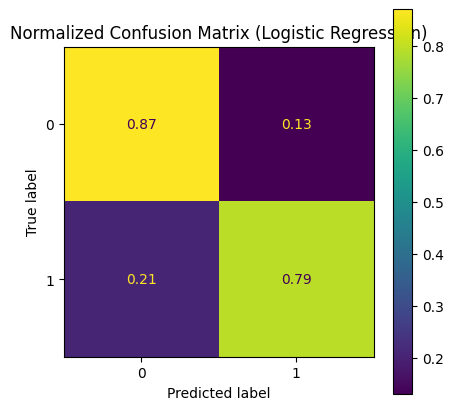

In [ ]:

# Evaluate the model
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_class, average="binary")
auc_roc = roc_auc_score(y_test, y_pred_sm)
logloss = log_loss(y_test, y_pred_sm)
cm = confusion_matrix(y_test, y_pred_class, normalize="true")

# Print evaluation metrics
print("\nMetrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Log Loss: {logloss:.2f}")
print(f"Normalized Confusion Matrix: {cm}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Logistic Regression)")
plt.show()

Decision Tree


Decision Tree Metrics:
Precision: 0.87
Recall (Sensitivity): 0.78
F1 Score: 0.82
AUC-ROC: 0.89
Log Loss: 1.30
Normalized Confusion Matrix: [[0.84415584 0.15584416]
 [0.22429907 0.77570093]]


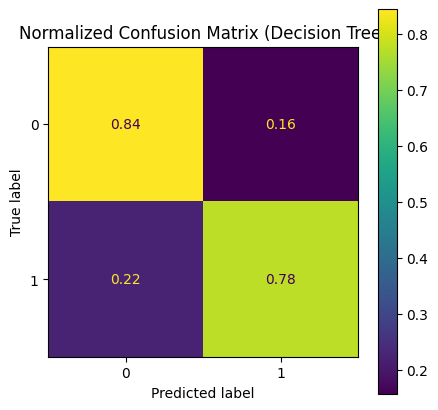

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define and train the Decision Tree with the specified hyperparameters
best_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=3,
    min_samples_split=10,
    random_state=42
)
best_tree.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_tree = best_tree.predict(X_test)
y_proba_tree = best_tree.predict_proba(X_test)[:, 1]

# Compute metrics
precision_tree, recall_tree, f1_tree, _ = precision_recall_fscore_support(
    y_test, y_pred_tree, average="binary"
)
auc_roc_tree = roc_auc_score(y_test, y_proba_tree)
logloss_tree = log_loss(y_test, y_proba_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, normalize="true")

# Print evaluation metrics
print("\nDecision Tree Metrics:")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall (Sensitivity): {recall_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")
print(f"AUC-ROC: {auc_roc_tree:.2f}")
print(f"Log Loss: {logloss_tree:.2f}")
print(f"Normalized Confusion Matrix: {cm_tree}")

# Display the normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1])
cmd_tree.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Decision Tree)")
plt.show()


Random Forest


Random Forest Metrics:
Precision: 0.89
Recall (Sensitivity): 0.88
F1 Score: 0.88
AUC-ROC: 0.92
Log Loss: 0.37
Normalized Confusion Matrix: [[0.84415584 0.15584416]
 [0.12149533 0.87850467]]


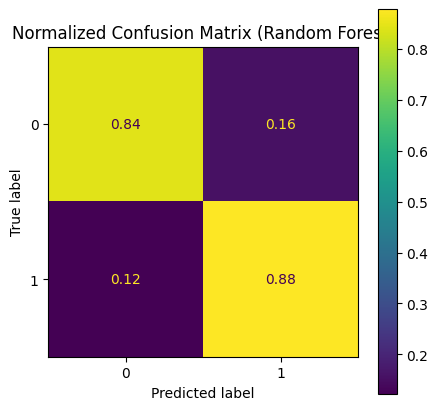

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model with specified parameters
best_rf_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=20,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Evaluate the best Random Forest model on the test set
y_pred_rf_model = best_rf_model.predict(X_test)
y_proba_rf_model = best_rf_model.predict_proba(X_test)[:, 1]

# Compute metrics
precision_rf_model, recall_rf_model, f1_rf_model, _ = precision_recall_fscore_support(
    y_test, y_pred_rf_model, average="binary"
)
auc_roc_rf_model = roc_auc_score(y_test, y_proba_rf_model)
logloss_rf_model = log_loss(y_test, y_proba_rf_model)
cm_rf_model = confusion_matrix(y_test, y_pred_rf_model, normalize="true")

# Print evaluation metrics
print("\nRandom Forest Metrics:")
print(f"Precision: {precision_rf_model:.2f}")
print(f"Recall (Sensitivity): {recall_rf_model:.2f}")
print(f"F1 Score: {f1_rf_model:.2f}")
print(f"AUC-ROC: {auc_roc_rf_model:.2f}")
print(f"Log Loss: {logloss_rf_model:.2f}")
print(f"Normalized Confusion Matrix: {cm_rf_model}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_rf_model = ConfusionMatrixDisplay(confusion_matrix=cm_rf_model, display_labels=[0, 1])
cmd_rf_model.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Random Forest)")
plt.show()


LightGBM

[LightGBM] [Info] Number of positive: 401, number of negative: 333
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546322 -> initscore=0.185819
[LightGBM] [Info] Start training from score 0.185819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

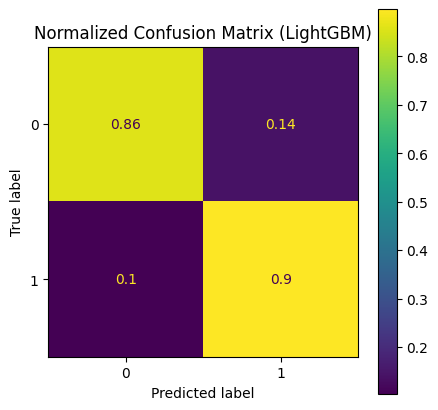

In [ ]:
import lightgbm as lgb

# Define and train the LightGBM model with specified parameters
best_lgb_model = lgb.LGBMClassifier(
    learning_rate=0.05,
    max_depth=5,
    min_child_samples=50,
    n_estimators=100,
    num_leaves=10,
    random_state=42
)
best_lgb_model.fit(X_train, y_train)

# Evaluate the best LightGBM model on the test set
y_pred_lgb_model = best_lgb_model.predict(X_test)
y_proba_lgb_model = best_lgb_model.predict_proba(X_test)[:, 1]

# Compute metrics
precision_lgb_model, recall_lgb_model, f1_lgb_model, _ = precision_recall_fscore_support(
    y_test, y_pred_lgb_model, average="binary"
)
auc_roc_lgb_model = roc_auc_score(y_test, y_proba_lgb_model)
logloss_lgb_model = log_loss(y_test, y_proba_lgb_model)
cm_lgb_model = confusion_matrix(y_test, y_pred_lgb_model, normalize="true")

# Print evaluation metrics
print("\nLightGBM Metrics:")
print(f"Precision: {precision_lgb_model:.2f}")
print(f"Recall (Sensitivity): {recall_lgb_model:.2f}")
print(f"F1 Score: {f1_lgb_model:.2f}")
print(f"AUC-ROC: {auc_roc_lgb_model:.2f}")
print(f"Log Loss: {logloss_lgb_model:.2f}")
print(f"Normalized Confusion Matrix: {cm_lgb_model}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_lgb_model = ConfusionMatrixDisplay(confusion_matrix=cm_lgb_model, display_labels=[0, 1])
cmd_lgb_model.plot(ax=ax)
plt.title("Normalized Confusion Matrix (LightGBM)")
plt.show()


XGBoost



XGBoost Metrics:
Precision: 0.89
Recall (Sensitivity): 0.89
F1 Score: 0.89
AUC-ROC: 0.93
Log Loss: 0.35
Normalized Confusion Matrix: [[0.84415584 0.15584416]
 [0.11214953 0.88785047]]


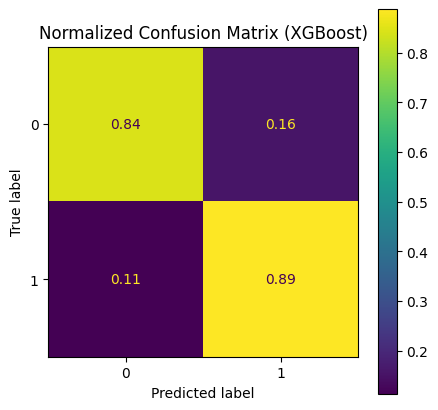

In [ ]:
from xgboost import XGBClassifier

# Define and train the XGBoost model with specified parameters
best_xgb = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=5,
    n_estimators=30,
    subsample=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_xgb.fit(X_train, y_train)

# Evaluate the best XGBoost model on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Compute metrics
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(
    y_test, y_pred_xgb, average="binary"
)
auc_roc_xgb = roc_auc_score(y_test, y_proba_xgb)
logloss_xgb = log_loss(y_test, y_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb, normalize="true")

# Print evaluation metrics
print("\nXGBoost Metrics:")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall (Sensitivity): {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")
print(f"AUC-ROC: {auc_roc_xgb:.2f}")
print(f"Log Loss: {logloss_xgb:.2f}")
print(f"Normalized Confusion Matrix: {cm_xgb}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
cmd_xgb.plot(ax=ax)
plt.title("Normalized Confusion Matrix (XGBoost)")
plt.show()


Neural Network

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Neural Network Metrics:
Precision: 0.92
Recall (Sensitivity): 0.92
F1 Score: 0.92
AUC-ROC: 0.93
Log Loss: 0.34
Normalized Confusion Matrix: [[0.88311688 0.11688312]
 [0.08411215 0.91588785]]


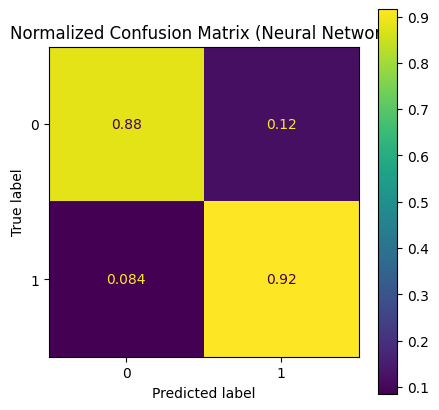

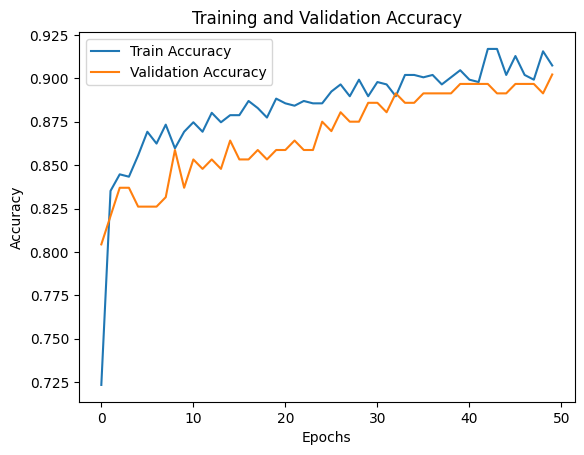

In [ ]:

# Make predictions
y_proba_nn = nn_model.predict(X_test).flatten()
y_pred_nn = (y_proba_nn > 0.5).astype(int)

# Compute evaluation metrics
precision_nn, recall_nn, f1_nn, _ = precision_recall_fscore_support(
    y_test, y_pred_nn, average="binary"
)
auc_roc_nn = roc_auc_score(y_test, y_proba_nn)
logloss_nn = log_loss(y_test, y_proba_nn)
cm_nn = confusion_matrix(y_test, y_pred_nn, normalize="true")

# Print evaluation metrics
print("\nNeural Network Metrics:")
print(f"Precision: {precision_nn:.2f}")
print(f"Recall (Sensitivity): {recall_nn:.2f}")
print(f"F1 Score: {f1_nn:.2f}")
print(f"AUC-ROC: {auc_roc_nn:.2f}")
print(f"Log Loss: {logloss_nn:.2f}")
print(f"Normalized Confusion Matrix: {cm_nn}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=[0, 1])
cmd_nn.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Neural Network)")
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


Now let's compare results of our models side by side.

The most three important metrics in our case are Recall, AUC-ROC, and F1 score.

In predicting heart disease, Recall (Sensitivity) is crucial as it ensures high-risk patients are identified, minimizing life-threatening false negatives. AUC-ROC provides a comprehensive measure of the model’s ability to distinguish between healthy and at-risk patients across thresholds, ensuring robust overall performance. F1 Score balances precision and recall, offering a reliable indicator of the model’s effectiveness in scenarios where both false negatives and false positives have significant implications.

In [ ]:
# Updated model comparison DataFrame with all metrics rounded to 3 decimals
model_comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "LightGBM",
        "XGBoost",
        "Neural Network"
    ],
    "Precision": [
        round(precision, 3),
        round(precision_tree, 3),
        round(precision_rf_model, 3),
        round(precision_lgb_model, 3),
        round(precision_xgb, 3),
        round(precision_nn, 3)
    ],
    "Recall": [
        round(recall, 3),
        round(recall_tree, 3),
        round(recall_rf_model, 3),
        round(recall_lgb_model, 3),
        round(recall_xgb, 3),
        round(recall_nn, 3)
    ],
    "F1 Score": [
        round(f1, 3),
        round(f1_tree, 3),
        round(f1_rf_model, 3),
        round(f1_lgb_model, 3),
        round(f1_xgb, 3),
        round(f1_nn, 3)
    ],
    "AUC-ROC": [
        round(auc_roc, 3),
        round(auc_roc_tree, 3),
        round(auc_roc_rf_model, 3),
        round(auc_roc_lgb_model, 3),
        round(auc_roc_xgb, 3),
        round(auc_roc_nn, 3)
    ],
    "Log Loss": [
        round(logloss, 3),
        round(logloss_tree, 3),
        round(logloss_rf_model, 3),
        round(logloss_lgb_model, 3),
        round(logloss_xgb, 3),
        round(logloss_nn, 3)
    ]
})

# Display the updated DataFrame
print(model_comparison)


                 Model  Precision  Recall  F1 Score  AUC-ROC  Log Loss
0  Logistic Regression      0.895   0.794     0.842    0.923     0.370
1        Decision Tree      0.874   0.776     0.822    0.894     1.299
2        Random Forest      0.887   0.879     0.883    0.924     0.371
3             LightGBM      0.897   0.897     0.897    0.929     0.342
4              XGBoost      0.888   0.888     0.888    0.929     0.352
5       Neural Network      0.916   0.916     0.916    0.935     0.345


### One Final Check

Based on our results, we are going to proceed with LighGBM. The Neural Network has marginally better overall performance, but it't not enough to justify the lack of explainability of this type of model. LightGBM has the highest Recall (same as the Neural Network), which we consider the most important metric in this scenario, given how important predicting true positives is in a healthcare context. Moreover, its F1 score AUC-ROC are also very high.


Also, we originally tried optimizing the gridsearch for recall, but were not pleased with the results. Instead, we decided to initially optimize for ROC-AUC and then further tweak our chosen model.

Let's try some further tuning to see if we can get better recall without sacrificing too much precision.


Best Parameters from AUC-ROC Optimized gridsearch: {'learning_rate': 0.05, 'max_depth': 5, 'min_child_samples': 50, 'n_estimators': 100, 'num_leaves': 10}

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

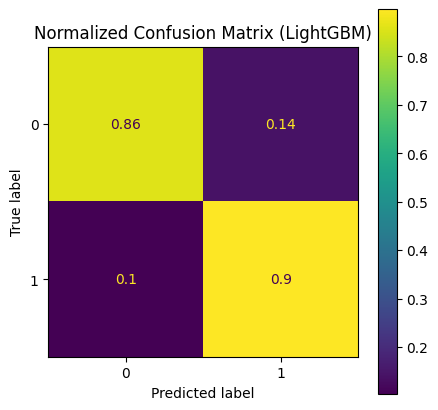

In [ ]:
# refit a standard LightGBM model with the specified parameters
lgb_standard_model = lgb.LGBMClassifier(
    learning_rate=0.05,
    max_depth=5,
    min_child_samples=50,
    n_estimators=100,
    num_leaves=10,
    random_state=42,
    verbose=0
)

# Train the model on the training data
lgb_standard_model.fit(X_train, y_train)

# Make predictions
y_pred_standard = lgb_standard_model.predict(X_test)
y_proba_standard = lgb_standard_model.predict_proba(X_test)[:, 1]

# Compute evaluation metrics
precision_standard, recall_standard, f1_standard, _ = precision_recall_fscore_support(
    y_test, y_pred_standard, average="binary"
)
auc_roc_standard = roc_auc_score(y_test, y_proba_standard)
logloss_standard = log_loss(y_test, y_proba_standard)
cm_standard = confusion_matrix(y_test, y_pred_standard, normalize="true")

# Print evaluation metrics
print("\nStandard LightGBM Metrics:")
print(f"Precision: {precision_standard:.2f}")
print(f"Recall (Sensitivity): {recall_standard:.2f}")
print(f"F1 Score: {f1_standard:.2f}")
print(f"AUC-ROC: {auc_roc_standard:.2f}")
print(f"Log Loss: {logloss_standard:.2f}")
print(f"Normalized Confusion Matrix: {cm_standard}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_standard = ConfusionMatrixDisplay(confusion_matrix=cm_standard, display_labels=[0, 1])
cmd_standard.plot(ax=ax)
plt.title("Normalized Confusion Matrix (LightGBM)")
plt.show()


Let's try keeping the parameters the same but lowering the threshold from 0.5 to 0.4 to increase sensitivity.


Standard LightGBM Metrics with Adjusted Threshold (0.4):
Precision: 0.88
Recall (Sensitivity): 0.91
F1 Score: 0.89
AUC-ROC: 0.93
Log Loss: 0.34
Normalized Confusion Matrix: [[0.83116883 0.16883117]
 [0.09345794 0.90654206]]


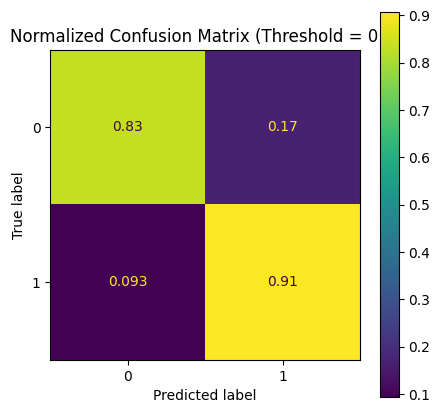

In [ ]:
# Adjust the classification threshold to 0.4 for the standard LightGBM model
threshold_standard = 0.4
y_pred_standard_adjusted = (y_proba_standard > threshold_standard).astype(int)  # Adjust predictions based on new threshold

# Recompute metrics with the adjusted threshold
precision_standard_adjusted, recall_standard_adjusted, f1_standard_adjusted, _ = precision_recall_fscore_support(
    y_test, y_pred_standard_adjusted, average="binary"
)
auc_roc_standard_adjusted = auc_roc_standard  # AUC remains the same as it's threshold-independent
logloss_standard_adjusted = logloss_standard  # Log Loss remains unaffected by threshold
cm_standard_adjusted = confusion_matrix(y_test, y_pred_standard_adjusted, normalize="true")

# Print evaluation metrics
print(f"\nStandard LightGBM Metrics with Adjusted Threshold ({threshold_standard}):")
print(f"Precision: {precision_standard_adjusted:.2f}")
print(f"Recall (Sensitivity): {recall_standard_adjusted:.2f}")
print(f"F1 Score: {f1_standard_adjusted:.2f}")
print(f"AUC-ROC: {auc_roc_standard_adjusted:.2f}")
print(f"Log Loss: {logloss_standard_adjusted:.2f}")
print(f"Normalized Confusion Matrix: {cm_standard_adjusted}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_standard_adjusted = ConfusionMatrixDisplay(confusion_matrix=cm_standard_adjusted, display_labels=[0, 1])
cmd_standard_adjusted.plot(ax=ax)
plt.title(f"Normalized Confusion Matrix (Threshold = {threshold_standard})")
plt.show()


I'm not convinced by this trade-off. Recall improved very little (less than 1%) but the instances of Type I error increased by 3 percentage points.

Let's stick with our lightGBM Model with a standard 0.5 threshold optimized for AUC-ROC though Gridsearch and 5-fold cross validation.

One Extra Step: Explainability

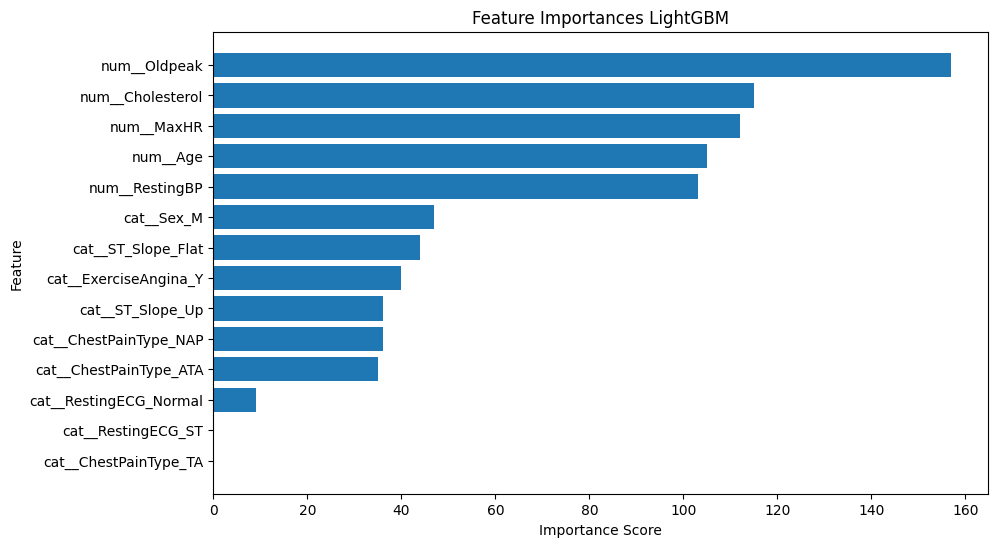

In [ ]:
feature_importances = lgb_standard_model.feature_importances_
feature_names = X_train.columns  # Ensure feature names match transformed data
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.title("Feature Importances LightGBM")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


We can see the oldpeak, cholesterol, max heart rate, age, and resting BP are the most instumental features to predicting heart disease with our LIghtGBM model.